In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import income and housing data

income_housing_data = pd.read_csv("./Input Files/Income and Housing Data.csv")

# import weather data

weather_data = pd.read_csv("./Input Files/Weather Data.csv")

In [2]:
# refine weather data by selecting relavant columns

weather_data = weather_data[["Geography","Latitude","Longitude","Avg Temperature","Max Temperature","Min Temperature","Avg Percipitation","Min Humidity","Max Humidity","Avg Wind"]]
weather_data = weather_data.rename(columns={"Avg Temperature":"Avg Temperature (F)","Max Temperature":"Max Temperature (F)","Min Temperature":"Min Temperature (F)","Avg Percipitation":"Avg Percipitation (in.)","Min Humidity":"Min Humidity (%)","Max Humidity":"Max Humidity (%)","Avg Wind":"Avg Wind (mph)"})

# merge income and wousing ata with weather data

final_data = pd.merge(income_housing_data,weather_data,how='left', on='Geography')
final_data.head()

,Geography,County,State,Median Income,ACS Home Value,Zillow Home Value,Zillow Bottom Tier Home Value,Zillow Top Tier Home Value,Latitude,Longitude,Avg Temperature (F),Max Temperature (F),Min Temperature (F),Avg Percipitation (in.),Min Humidity (%),Max Humidity (%),Avg Wind (mph)
0,"Autauga County, Alabama",Autauga County,Alabama,72110,143000.0,159300.0,NaN,235400.0,32.579182,-86.499655,42.77525,50.5175,35.033,0.199706,67.427499,85.572501,8.669225
1,"Baldwin County, Alabama",Baldwin County,Alabama,73061,182000.0,213600.0,134800.0,384900.0,30.601074,-87.776333,49.13600,55.0130,43.259,1.258076,64.617499,86.777501,14.520748
2,"Barbour County, Alabama",Barbour County,Alabama,45445,89300.0,NaN,NaN,NaN,31.817290,-85.354965,46.38650,54.4280,38.345,0.489574,73.502501,89.709999,9.349027
3,"Bibb County, Alabama",Bibb County,Alabama,61099,105500.0,NaN,NaN,NaN,32.956280,-87.142289,42.64025,50.2385,35.042,0.176748,64.125000,84.714999,9.697154
4,"Blount County, Alabama",Blount County,Alabama,58974,122200.0,140600.0,82700.0,228600.0,34.014515,-86.499655,38.18075,44.9825,31.379,0.114534,62.280000,84.495001,9.929110


In [3]:
final_data.to_csv("./Output Files/Final Data.csv", index=False, header=True)

final_data['ACS Home Value'] = pd.to_numeric(final_data['ACS Home Value'])

final_data.dtypes

Geography                         object
County                            object
State                             object
Median Income                      int64
ACS Home Value                   float64
Zillow Home Value                float64
Zillow Bottom Tier Home Value    float64
Zillow Top Tier Home Value       float64
Latitude                         float64
Longitude                        float64
Avg Temperature (F)              float64
Max Temperature (F)              float64
Min Temperature (F)              float64
Avg Percipitation (in.)          float64
Min Humidity (%)                 float64
Max Humidity (%)                 float64
Avg Wind (mph)                   float64
dtype: object

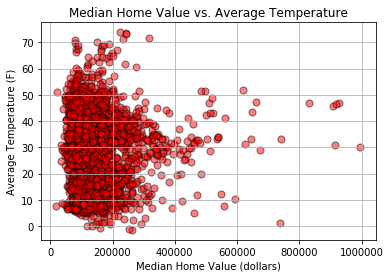

In [4]:
# median home price vs avg temp
plt.scatter(final_data['ACS Home Value'], final_data['Avg Temperature (F)'], marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.5)


plt.xlabel("Median Home Value (dollars)")
plt.ylabel("Average Temperature (F)")
plt.title("Median Home Value vs. Average Temperature")
plt.grid()

# Save the Figure
plt.savefig("Figures/Med Home Value vs Avg Temp.png")

plt.show()

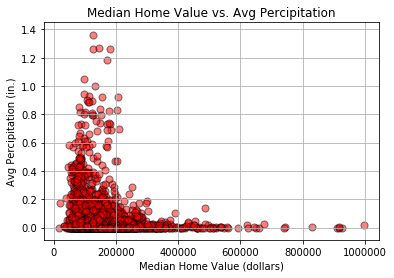

In [5]:
# median home price vs avg percipitation
plt.scatter(final_data['ACS Home Value'], final_data['Avg Percipitation (in.)'], marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.5)


plt.xlabel("Median Home Value (dollars)")
plt.ylabel("Avg Percipitation (in.)")
plt.title("Median Home Value vs. Avg Percipitation")
plt.grid()

# Save the Figure
plt.savefig("Figures/Med Home Value vs Avg Percip.png")

plt.show()

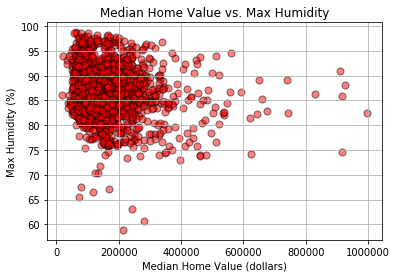

In [6]:
# median home price vs max humidity
plt.scatter(final_data['ACS Home Value'], final_data['Max Humidity (%)'], marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.5)


plt.xlabel("Median Home Value (dollars)")
plt.ylabel("Max Humidity (%)")
plt.title("Median Home Value vs. Max Humidity")
plt.grid()

# Save the Figure
plt.savefig("Figures/Med Home Value vs Max Humidity.png")

plt.show()

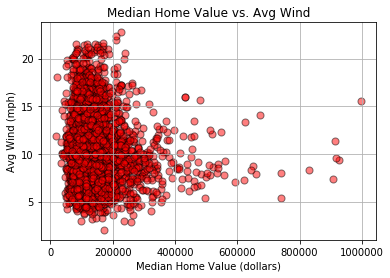

In [7]:
# median home price vs avg wind
plt.scatter(final_data['ACS Home Value'], final_data['Avg Wind (mph)'], marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.5)


plt.xlabel("Median Home Value (dollars)")
plt.ylabel("Avg Wind (mph)")
plt.title("Median Home Value vs. Avg Wind")
plt.grid()

# Save the Figure
plt.savefig("Figures/Med Home Value vs Avg Wind.png")

plt.show()

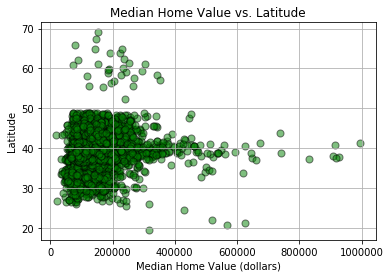

In [8]:
# median home price vs latitude for the best weather
plt.scatter(final_data['ACS Home Value'], final_data['Latitude'], marker="o", facecolors="green", edgecolors="black",
            s=50, alpha=0.5)


plt.xlabel("Median Home Value (dollars)")
plt.ylabel("Latitude")
plt.title("Median Home Value vs. Latitude")
plt.grid()

# Save the Figure
plt.savefig("Figures/Best Weather - Med Home Value vs Latitude.png")

plt.show()

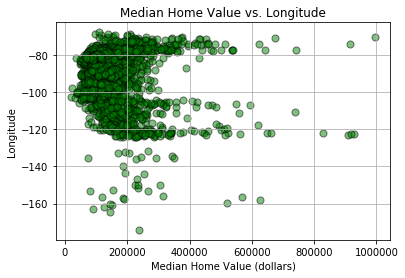

In [9]:
# median home price vs longitude for the best weather
plt.scatter(final_data['ACS Home Value'], final_data['Longitude'], marker="o", facecolors="green", edgecolors="black",
            s=50, alpha=0.5)


plt.xlabel("Median Home Value (dollars)")
plt.ylabel("Longitude")
plt.title("Median Home Value vs. Longitude")
plt.grid()

# Save the Figure
plt.savefig("Figures/Best Weather - Med Home Value vs Longitude.png")

plt.show()

In [10]:
# pull counties with "good weather"

#low average rain fall
low_percip = final_data.loc[final_data["Avg Percipitation (in.)"] < .2, :]

# less than 15 mph average wind speed
low_percip_low_wind = low_percip.loc[low_percip["Avg Wind (mph)"] < 16, :]

# less than 50 degrees for average temperature
best_weather = low_percip_low_wind.loc[low_percip_low_wind["Avg Temperature (F)"] < 52, :]

# pull counties with the best location

#latitude filter
best_weather_best_location = best_weather.loc[(best_weather["Latitude"] < 45) & (best_weather["Latitude"] > 30), :]

# longitude filter
best_weather_best_location = best_weather_best_location.loc[(best_weather_best_location["Longitude"] < -100) | (best_weather_best_location["Longitude"] > -80), :]

# filter by cheapest locations

cheapest = best_weather_best_location.loc[best_weather_best_location['ACS Home Value'] < 200000,:]

print(len(cheapest))

534


In [12]:
import gmaps

# Configure gmaps
from config import gkey

gmaps.configure(api_key=gkey)

In [26]:
# Customize the size of the figure
figure_layout = {
    'width': '800px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

coordinates = cheapest[['Latitude','Longitude']]

# Assign the marker layer to a variable
markers = gmaps.marker_layer(coordinates)
# Add the layer to the map

weights = cheapest['ACS Home Value']
fig.add_layer(gmaps.heatmap_layer(coordinates, weights=weights))

#fig.savefig("Heat Map of Cheapest Counties with the Best Weather.png")

fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', margin='0 auto 0 auto', padding='1px', wi…